In [2]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [1]:
!pip install pandas matplotlib seaborn scipy openpyxl

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [9]:
# Load station data (daily)
df_daily = pd.read_excel('Chitwan-upto-3-Aug-2024.xlsx', sheet_name=0)

# Ensure 'Date' is datetime
df_daily['Date'] = pd.to_datetime(df_daily['Date'], format='%d-%b-%Y', errors='coerce')
df_daily = df_daily.dropna(subset=['Date']).reset_index(drop=True)

# Extract Year, Month, Month Name
df_daily['Year'] = df_daily['Date'].dt.year
df_daily['Month'] = df_daily['Date'].dt.month
df_daily['Month_Name'] = df_daily['Date'].dt.month_name()

# Define Seasons (Nepal: Winter=Dec-Feb, Spring=Mar-May, Summer=Jun-Aug, Autumn=Sep-Nov)
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df_daily['Season'] = df_daily['Month'].apply(get_season)

print("✅ Station data loaded and processed.")
print(f"Data range: {df_daily['Date'].min()} to {df_daily['Date'].max()}")

✅ Station data loaded and processed.
Data range: 2020-01-02 00:00:00 to 2024-08-03 00:00:00


In [11]:
# Load and Clean ERA5 Data

# Load ERA5 monthly data
df_era5 = pd.read_csv('ERA5_Monthly_Precipitation_2001_2025.csv')

# If column names differ, rename them (adjust if needed)
# df_era5.rename(columns={'year': 'Year', 'month': 'Month', 'precipitation': 'Precipitation'}, inplace=True)

# Ensure Year and Month are integers
df_era5['Year'] = df_era5['year'].astype(int)
df_era5['Month'] = df_era5['month'].astype(int)
df_era5 = df_era5[['Year', 'Month', 'mean']].copy()
df_era5.rename(columns={'mean': 'Precipitation'}, inplace=True)

print("✅ ERA5 data loaded and processed.")

✅ ERA5 data loaded and processed.


In [16]:
# Trend Analysis + Linear Regression (Station Annual)

# Calculate annual total precipitation (exclude 2025)
annual_precip = df_daily[df_daily['Year'] < 2025].groupby('Year')['Rain_mm_total'].sum().reset_index()

# Linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(annual_precip['Year'], annual_precip['Rain_mm_total'])
regression_line = intercept + slope * annual_precip['Year']

print(f"\n📊 LINEAR REGRESSION EQUATION (STATION DATA)")
print(f"Annual Precipitation = {slope:.2f} × Year + {intercept:.2f}")
print(f"R² = {r_value**2:.4f}, p-value = {p_value:.4f}\n")


📊 LINEAR REGRESSION EQUATION (STATION DATA)
Annual Precipitation = -588.57 × Year + 1192006.25
R² = 0.9457, p-value = 0.0055



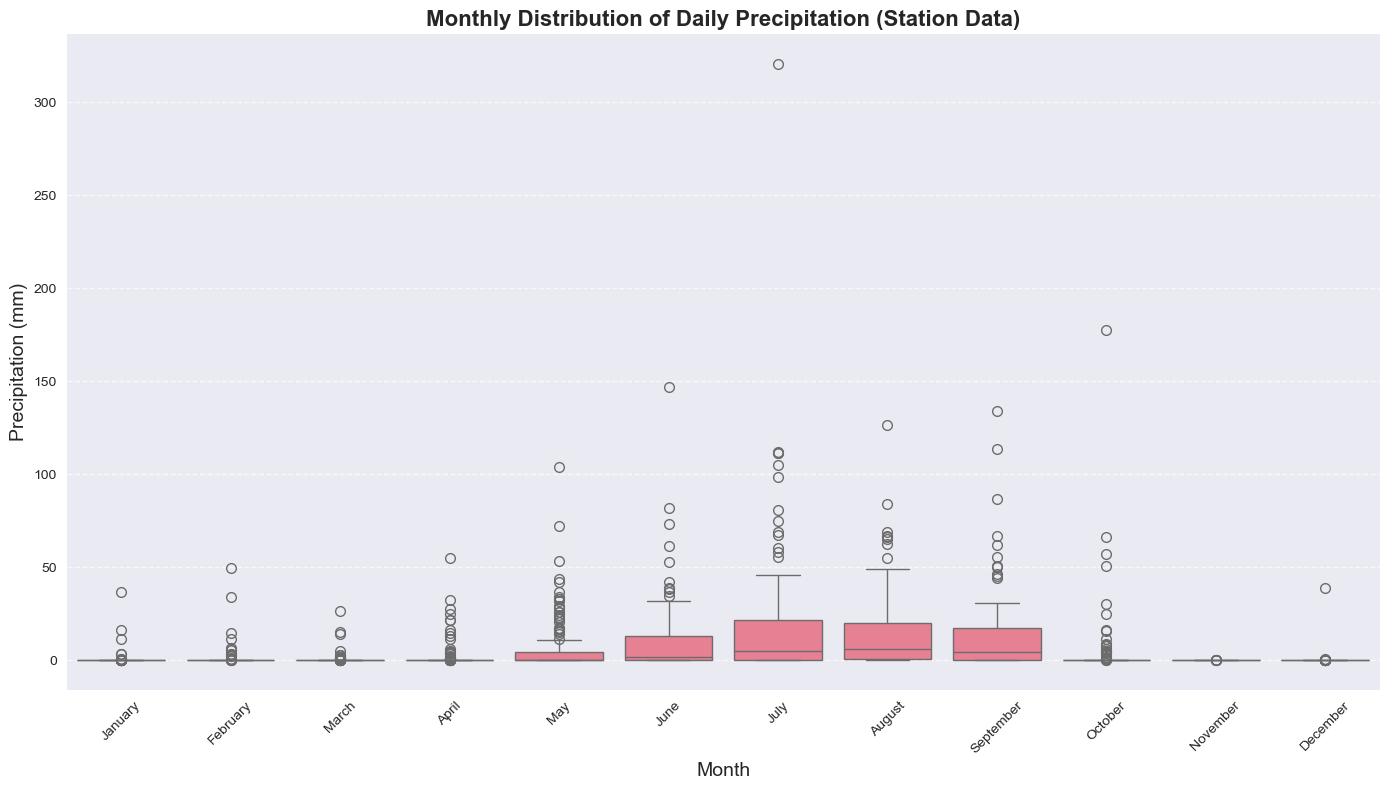

In [18]:
# Monthly Box Plot (Station Daily Data)

plt.figure(figsize=(14, 8))
sns.boxplot(data=df_daily, x='Month_Name', y='Rain_mm_total',
            order=['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Monthly Distribution of Daily Precipitation (Station Data)', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Precipitation (mm)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [19]:
# Total Annual Precipitation
print("\n🌧️ TOTAL ANNUAL PRECIPITATION (mm, Station Data)")
for _, row in annual_precip.iterrows():
    print(f"{int(row['Year'])}: {row['Rain_mm_total']:.2f} mm")


🌧️ TOTAL ANNUAL PRECIPITATION (mm, Station Data)
2020: 2987.55 mm
2021: 2674.11 mm
2022: 2063.24 mm
2023: 988.06 mm
2024: 887.73 mm


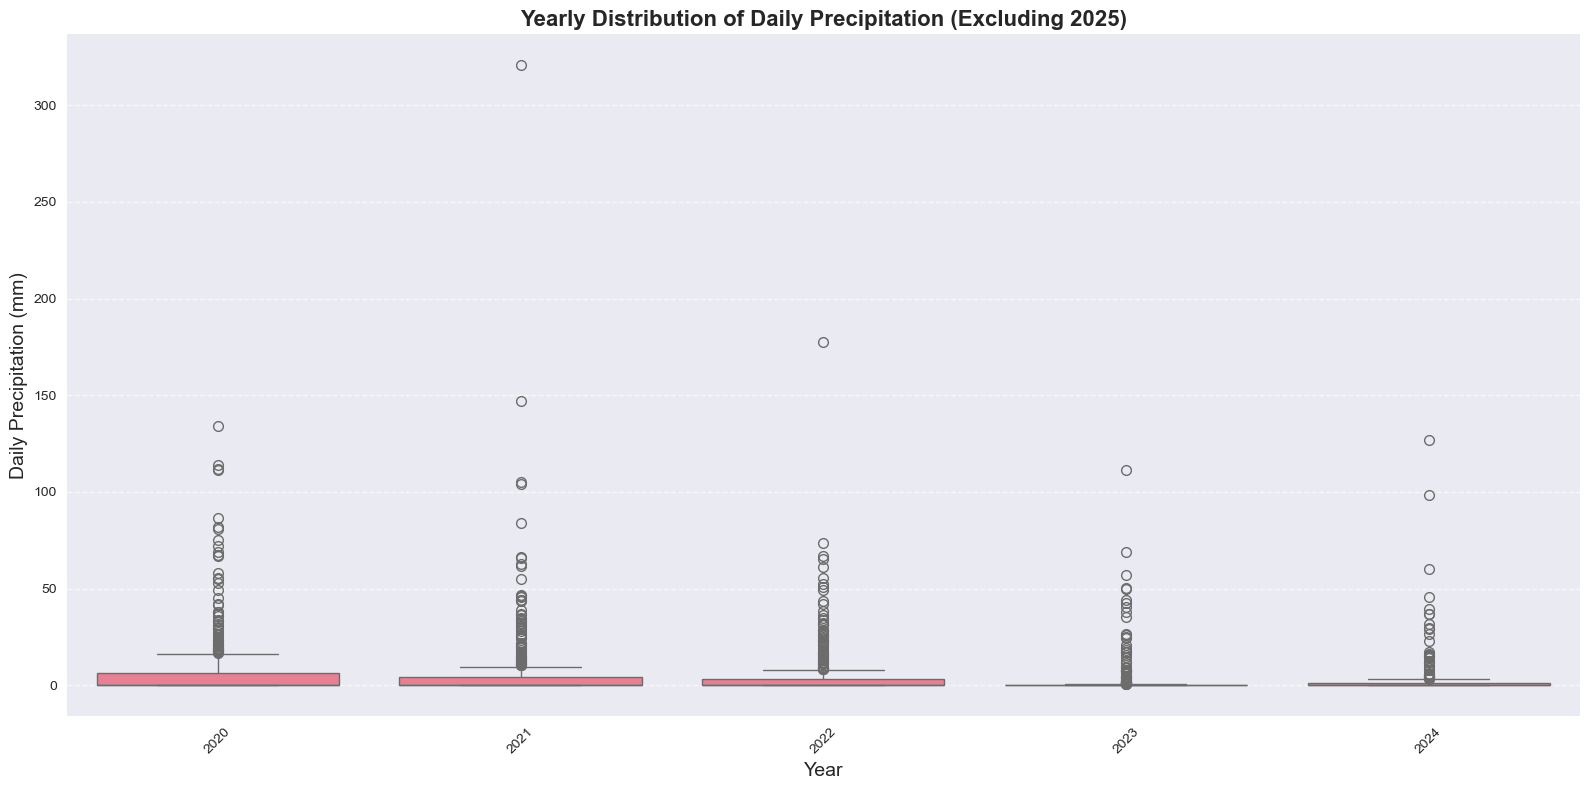

In [20]:
# Year-wise Box Plot (Exclude 2025)

df_yearly_box = df_daily[df_daily['Year'] < 2025].copy()

plt.figure(figsize=(16, 8))
sns.boxplot(data=df_yearly_box, x='Year', y='Rain_mm_total')
plt.title('Yearly Distribution of Daily Precipitation (Excluding 2025)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Daily Precipitation (mm)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

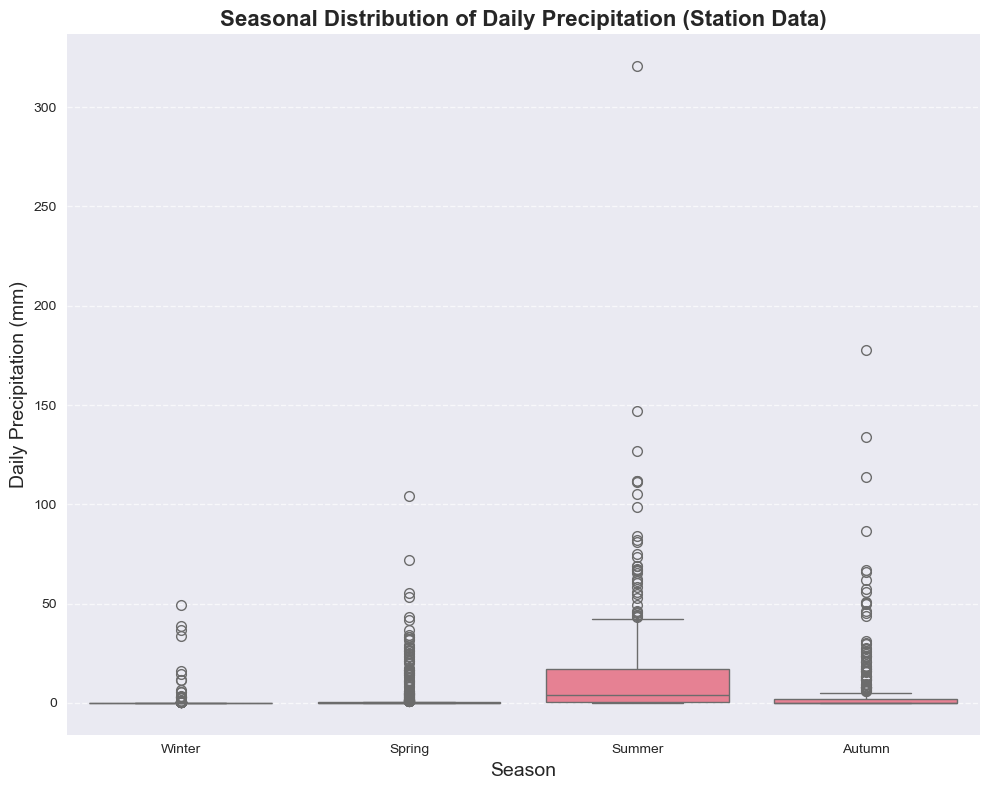

In [21]:
# Seasonal Box Plot

plt.figure(figsize=(10, 8))
sns.boxplot(data=df_daily, x='Season', y='Rain_mm_total',
            order=['Winter', 'Spring', 'Summer', 'Autumn'])
plt.title('Seasonal Distribution of Daily Precipitation (Station Data)', fontsize=16, fontweight='bold')
plt.xlabel('Season', fontsize=14)
plt.ylabel('Daily Precipitation (mm)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [22]:
# Detailed Statistical Summary

print("\n" + "="*80)
print("📈 DETAILED STATISTICAL SUMMARY (STATION DATA)")
print("="*80)

# --- Monthly (Daily values) ---
monthly_stats = df_daily.groupby('Month_Name')['Rain_mm_total'].agg(['mean', 'min', 'max', 'std']).round(2)
monthly_stats = monthly_stats.reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

print("\n--- 📅 Monthly Statistics (Daily Precipitation) ---")
print(monthly_stats)

# --- Yearly (Daily values, exclude 2025) ---
yearly_stats = df_yearly_box.groupby('Year')['Rain_mm_total'].agg(['mean', 'min', 'max', 'std']).round(2)

print("\n--- 📅 Yearly Statistics (Daily Precipitation, Excluding 2025) ---")
print(yearly_stats)

# --- Seasonal (Daily values) ---
seasonal_stats = df_daily.groupby('Season')['Rain_mm_total'].agg(['mean', 'min', 'max', 'std']).round(2)
seasonal_stats = seasonal_stats.reindex(['Winter', 'Spring', 'Summer', 'Autumn'])

print("\n--- 🌦️ Seasonal Statistics (Daily Precipitation) ---")
print(seasonal_stats)

# --- Total Seasonal Precipitation per Year ---
seasonal_totals = df_daily.groupby(['Year', 'Season'])['Rain_mm_total'].sum().unstack(fill_value=0).round(2)
seasonal_totals = seasonal_totals[['Winter', 'Spring', 'Summer', 'Autumn']]

print("\n--- 🌦️ Total Seasonal Precipitation per Year (mm) ---")
print(seasonal_totals)


📈 DETAILED STATISTICAL SUMMARY (STATION DATA)

--- 📅 Monthly Statistics (Daily Precipitation) ---
             mean  min     max    std
Month_Name                           
January      0.50  0.0   36.83   3.36
February     0.99  0.0   49.53   5.28
March        0.53  0.0   26.67   2.74
April        1.85  0.0   55.12   6.74
May          6.20  0.0  104.14  14.10
June         9.49  0.0  146.81  17.88
July        17.27  0.0  320.55  34.23
August      14.61  0.0  126.75  20.78
September   12.92  0.0  134.11  21.50
October      4.14  0.0  177.55  18.50
November     0.01  0.0    0.25   0.05
December     0.35  0.0   38.86   3.49

--- 📅 Yearly Statistics (Daily Precipitation, Excluding 2025) ---
      mean  min     max    std
Year                          
2020  8.19  0.0  134.11  18.81
2021  7.33  0.0  320.55  23.08
2022  5.65  0.0  177.55  14.81
2023  2.71  0.0  111.25  10.12
2024  4.11  0.0  126.75  13.48

--- 🌦️ Seasonal Statistics (Daily Precipitation) ---
         mean  min     max    s

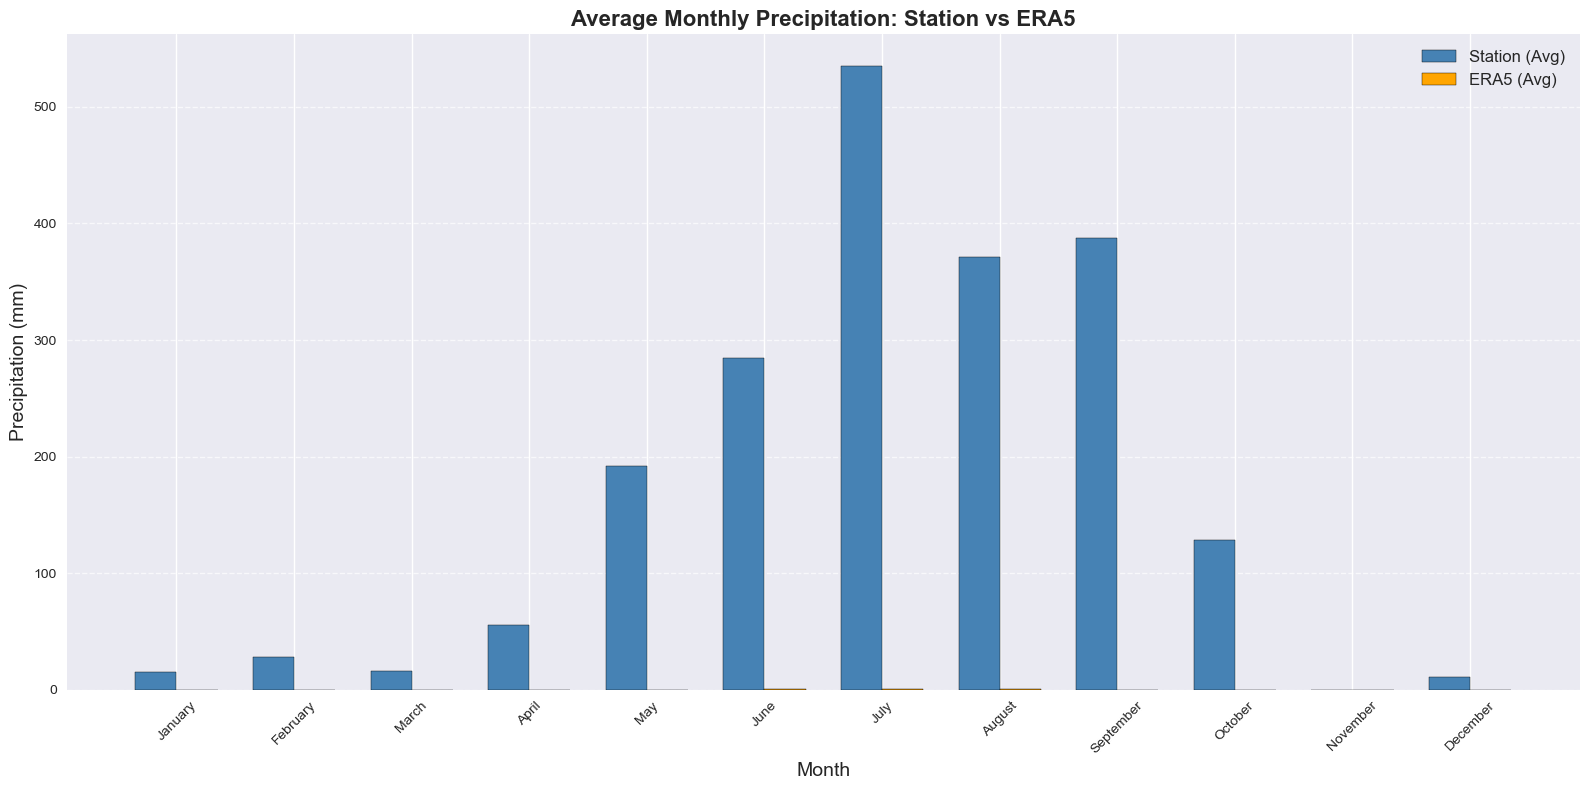


🌐 STATION vs ERA5 COMPARISON
Correlation Coefficient: 0.9097
Mean Bias (Station - ERA5): 171.23 mm
RMSE: 278.12 mm


In [23]:
#  Station vs ERA5 Comparison

# Compute monthly totals from station data
df_monthly_station = df_daily.groupby(['Year', 'Month'])['Rain_mm_total'].sum().reset_index()
df_monthly_station.rename(columns={'Rain_mm_total': 'Station_Precip_mm'}, inplace=True)

# Merge with ERA5
df_comparison = pd.merge(df_monthly_station, df_era5, on=['Year', 'Month'], how='inner')
df_comparison['Month_Name'] = pd.to_datetime(df_comparison[['Year', 'Month']].assign(DAY=1)).dt.month_name()

# Monthly comparison plot
plt.figure(figsize=(16, 8))
bar_width = 0.35
months = np.arange(12)
unique_months = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

monthly_avg = df_comparison.groupby('Month_Name')[['Station_Precip_mm', 'Precipitation']].mean().reindex(unique_months)

plt.bar(months - bar_width/2, monthly_avg['Station_Precip_mm'], bar_width, label='Station (Avg)', color='steelblue', edgecolor='black')
plt.bar(months + bar_width/2, monthly_avg['Precipitation'], bar_width, label='ERA5 (Avg)', color='orange', edgecolor='black')

plt.title('Average Monthly Precipitation: Station vs ERA5', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Precipitation (mm)', fontsize=14)
plt.xticks(months, unique_months, rotation=45)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Correlation & RMSE
corr_coef = df_comparison['Station_Precip_mm'].corr(df_comparison['Precipitation'])
mean_bias = (df_comparison['Station_Precip_mm'] - df_comparison['Precipitation']).mean()
rmse = np.sqrt(((df_comparison['Station_Precip_mm'] - df_comparison['Precipitation']) ** 2).mean())

print(f"\n🌐 STATION vs ERA5 COMPARISON")
print(f"Correlation Coefficient: {corr_coef:.4f}")
print(f"Mean Bias (Station - ERA5): {mean_bias:.2f} mm")
print(f"RMSE: {rmse:.2f} mm")

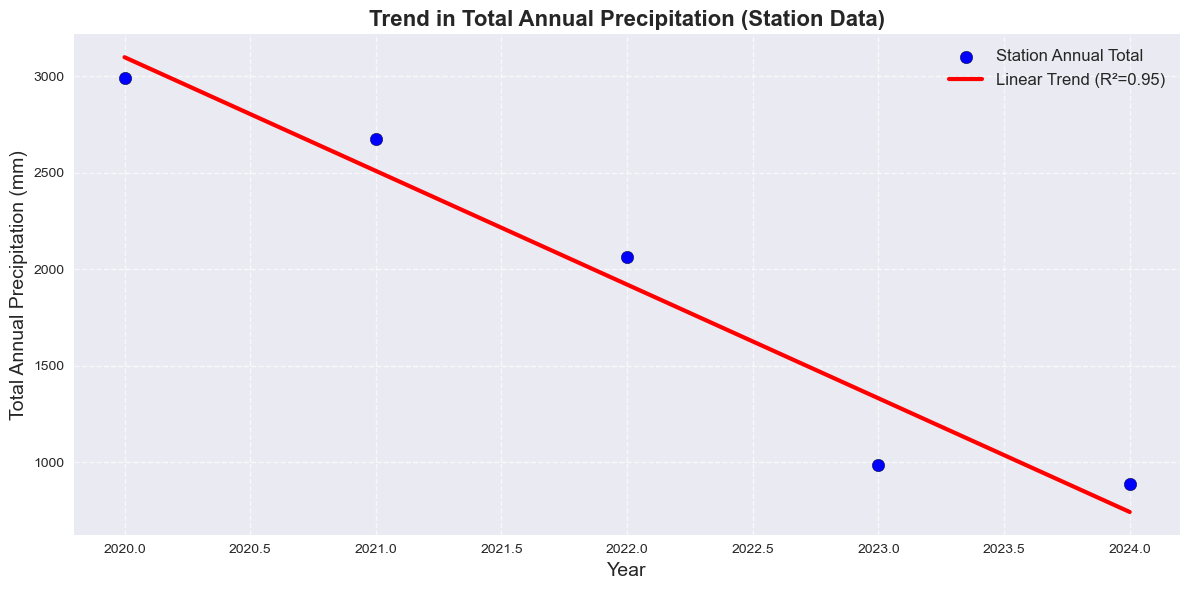

In [24]:
# Trend Plot (Visualization) - Optional

plt.figure(figsize=(12, 6))
plt.scatter(annual_precip['Year'], annual_precip['Rain_mm_total'],
            color='blue', label='Station Annual Total', s=80, edgecolor='k')
plt.plot(annual_precip['Year'], regression_line,
         color='red', linewidth=3, label=f'Linear Trend (R²={r_value**2:.2f})')
plt.title('Trend in Total Annual Precipitation (Station Data)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Annual Precipitation (mm)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()